# Module B: Section 17.4, 17.5
## Problems

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

# Scipy imports to test against custom implementations
from scipy.interpolate import lagrange

### Lagrange Interpolation

In [2]:
def lagrange_interp(x: np.array, y: np.array, X: np.array) -> np.array:
    """
    Lagrange interpolator for a set of data points.
    :param x: x-coordinates of data points
    :param y: y-coordinates of data points
    :param X: x-coordinates of interpolation points
    :return: y-coordinates of interpolation points
    """

    x_len = len(x)

    # Initialize output array with zeros of same shape as X
    Y = np.zeros(len(X))

    numer_func = lambda x_val, x_j: x_val - x_j
    denom_func = lambda x_i, x_j: x_i - x_j

    # Iterate through each X to Interp
    for _X_i, _X in enumerate(X):
        _Y = 0

        # Calculate each polynomial (Pi)
        for i, x_i in enumerate(x):
            # Initialize P_i
            P_i = 1

            # Get y value for x
            y_i = y[i]

            # Iterate through each x data
            for j, x_j in enumerate(x):
                if j != i:
                    P_i = P_i * (numer_func(_X, x_j)) / (denom_func(x_i, x_j))

            # Iterate L(x) step
            _Y += y_i * P_i

        # Add to Y
        Y[_X_i] = _Y

    return Y

In [3]:
# Function to test lagrange_interp and compare accuracy against scipy's lagrange interpolator
def test_lagrange_interp(x: np.array, y:np.array):
    # Test interpolation every 0.25 between x_test values
    X = np.arange(x[0] - 1, x[-1]+1, 0.25)

    # Get interpolated values
    Y = lagrange_interp(x, y, X)

    # Scipy Lagrange Interpolation to compare against
    f = lagrange(x, y)

    # Create x_range to graph
    x_range = np.arange(x[0] - 1, x[-1]+1, 0.1)

    # Plot
    fig = plt.figure(figsize = (10,8))
    plt.plot(x_range, f(x_range), 'b', X, Y, 'ro')
    plt.title('Lagrange Polynomial')
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

    # Check error
    test_error = np.mean(
        np.abs(
            (Y - f(X)) / f(X)*100
        )
    )

    # Print percent error
    print(f'Percent Error: {round(test_error, 5)}%')


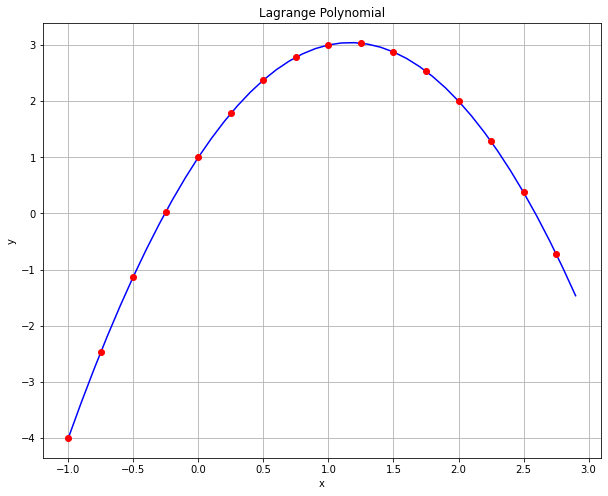

Percent Error: 0.0%


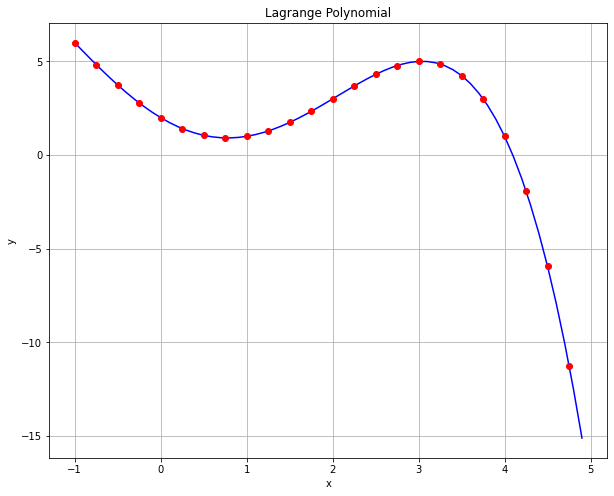

Percent Error: 0.0%


In [4]:
# Test 1
test_lagrange_interp(x = [0, 1, 2], y =  [1, 3, 2])

# Test 2
test_lagrange_interp(x = [0, 1, 2, 3, 4], y = [2, 1, 3, 5, 1])


### Newton's Polynomial Interpolation